### example for basic operation using tensors, and session

In [84]:
x = tf.constant([1,2,3,4])
y = tf.constant([1,2,3,4])
result = tf.multiply(x, y)
sess = tf.Session()
sess.run(result)

array([ 1,  4,  9, 16], dtype=int32)

### check the installed tennsorflow version

In [3]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.13.1


### load data form tf dataset

In [5]:
mnist = tf.keras.datasets.mnist
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


### trival model building

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape

(60000, 28, 28)

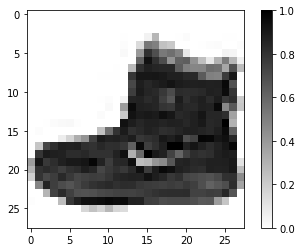

In [41]:
# plt.figure()
plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
# plt.show()

### normalize data to 0 - 1

In [32]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### build a esay keras model with 3 layers
falttern layer is used to change the original data to one dimension 
<br>
dense is a normal layer, with different activation funcitons

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


#### compile the model

In [43]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### train the model with 5 epochs

In [44]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.5003 - acc: 0.8231s - loss: 0.5044 - a
Epoch 2/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3770 - acc: 0.8635
Epoch 3/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3370 - acc: 0.8764
Epoch 4/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3140 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2953 - acc: 0.8913


In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 1s 88us/sample - loss: 0.3502 - acc: 0.87570s - loss: 0.3522 - 
Test accuracy: 0.8757


In [46]:
predictions = model.predict(test_images)
predictions[0]

array([1.8474342e-05, 5.5087146e-08, 3.4719096e-07, 3.0650003e-06,
       6.0086614e-07, 1.5844695e-03, 2.8323732e-06, 1.9504057e-02,
       1.0419098e-05, 9.7887576e-01], dtype=float32)

In [48]:
np.argmax(predictions[0]), test_labels[0]


(9, 9)

In [66]:
img = test_images[0]
img = np.expand_dims(img, 0)
predictions_single = model.predict(img)


In [68]:
np.argmax(predictions_single)

9

### visualize the reuslt of predication

In [78]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    # add ticks
    plt.xticks([])
    plt.yticks([])
    # change to binary color map
    plt.imshow(img, cmap=plt.cm.binary)
    # add label
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    # format label
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


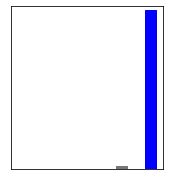

In [81]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

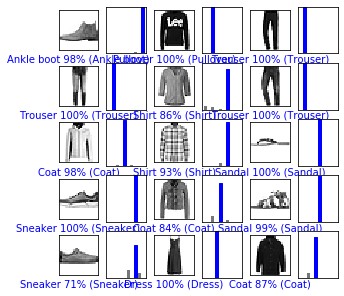

In [83]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [76]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

NameError: name 'plot_value_array' is not defined